In [415]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [416]:
import sys
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random
import time

In [417]:
from sklearn import feature_selection
from statistics import mean

In [418]:
data_raw_train= pd.read_csv('data/train.csv', index_col='PassengerId')
data_test= pd.read_csv('data/test.csv',index_col='PassengerId')
labels_test= pd.read_csv('data/gender_submission.csv',index_col='PassengerId')

In [419]:
data_raw_train.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [420]:
data_raw_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [421]:
data_raw_test=pd.concat([data_test, labels_test], axis=1)

In [422]:
data_raw_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [423]:
data_drop_train = data_raw_train.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
data_drop_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [424]:
data_drop_test = data_raw_test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
data_drop_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,0
893,3,female,47.0,1,0,7.0000,S,1
894,2,male,62.0,0,0,9.6875,Q,0
895,3,male,27.0,0,0,8.6625,S,0
896,3,female,22.0,1,1,12.2875,S,1


In [425]:
data_drop_train.Embarked.fillna("U", inplace=True) #most embarked
data_drop_test.Embarked.fillna("U", inplace=True)
data_drop_train.Age.fillna(-1, inplace=True)
data_drop_test.Age.fillna(-1, inplace=True)
data_drop_test.Fare.fillna(data_drop_test.Fare.median(), inplace=True)
data_drop_test.Fare.fillna(data_drop_train.Fare.median(), inplace=True)

In [426]:
# q=data_drop_train['Fare'].quantile(0.995)
# data_drop_train=data_drop_train[data_drop_train.Fare<q]

In [427]:
# q=data_drop_train['SibSp'].quantile(0.995)
# data_drop_train=data_drop_train[data_drop_train.SibSp<q]

In [428]:
#data_drop_test.dropna(inplace=True)
#data_drop_train.dropna(inplace=True)

<Figure size 864x864 with 0 Axes>

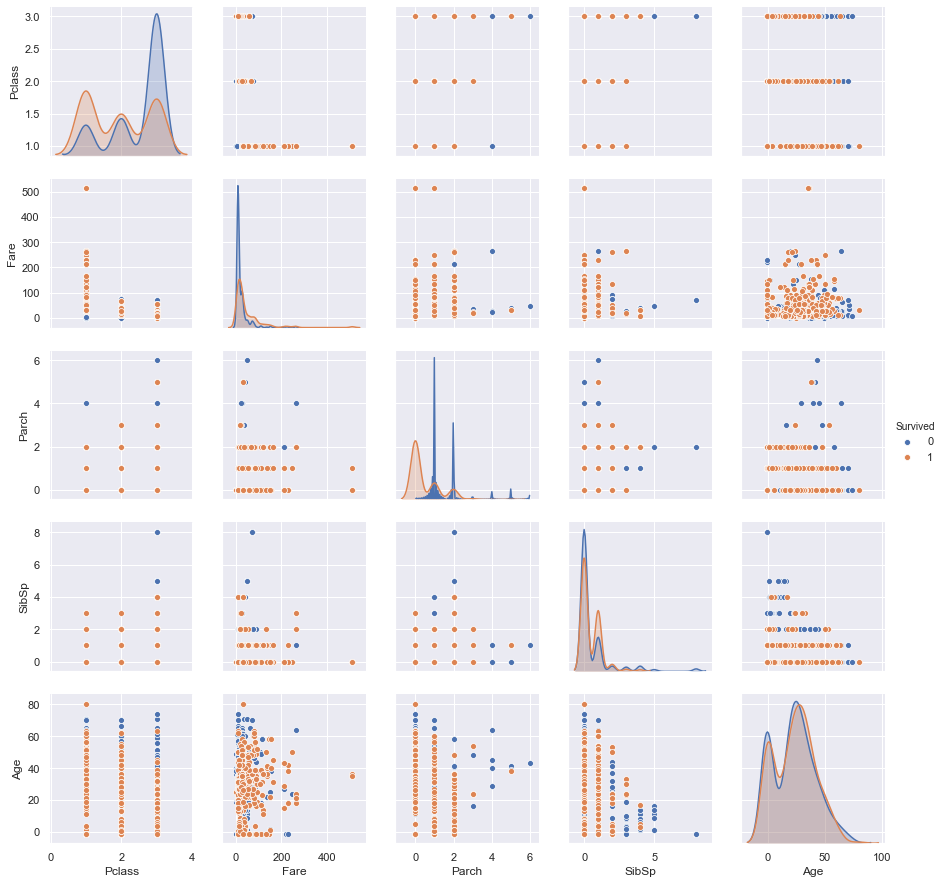

In [429]:
plt.figure(figsize=(12,12))
sns.pairplot(data_drop_train, hue='Survived', vars=['Pclass', 'Fare', 'Parch', 'SibSp','Age'])
plt.show()

In [430]:
#_, bins = np.histogram(data_drop_train["Pclass"])
#g = sns.FacetGrid(data_drop_train, hue="Survived")
#g = g.map(sns.distplot, "Pclass", bins=bins)
#plt.show()

In [431]:
data_train=pd.get_dummies(data_drop_train)
data_test=pd.get_dummies(data_drop_test)
data_train = data_train.drop(['Embarked_U','Sex_female'],axis=1)
data_test = data_test.drop(['Sex_female'],axis=1)

In [432]:
data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,23.600640,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,17.867496,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [433]:
data_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,23.838517,0.447368,0.392344,35.576535,0.363636,0.636364,0.244019,0.110048,0.645933
std,0.841838,17.883723,0.896760,0.981429,55.850103,0.481622,0.481622,0.430019,0.313324,0.478803
min,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,9.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,24.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.750000,1.000000,0.000000,31.471875,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [434]:
y_train=np.array(data_train.Survived)
y_test=np.array(data_test.Survived)
y_train.reshape(-1,1)
y_test.reshape(-1,1)

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [435]:
x_train=data_train.drop(['Survived'],axis=1)
x_test=data_test.drop(['Survived'],axis=1)
x_all=pd.concat([x_train,x_test])
x_all.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,23.676600,0.498854,0.385027,33.281086,0.644003,0.206264,0.093965,0.698243
std,0.837836,17.866186,1.041658,0.865560,51.741500,0.478997,0.404777,0.291891,0.459196
min,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,7.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,3.000000,24.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.275000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [436]:
from sklearn.preprocessing import StandardScaler
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

In [437]:
scl=StandardScaler()
scl.fit(x_all)
x_train=scl.transform(x_train)
x_test=scl.transform(x_test)

In [438]:
# param_grid ={'algorithm':('SAMME','SAMME.R'), 'n_estimators':[20,30,50]}
# abc=AdaBoostClassifier()
# clf_cv=GridSearchCV(abc, param_grid, cv=5)
# clf_cv.fit(x_train, y_train)
# print(clf_cv.best_params_)

In [439]:
# #param_grid ={'criterion':('gini','entropy'), 'n_estimators':[100], 'min_samples_split':[50], 'oob_score':[False]}
# clf_cv=GaussianNB()
# #clf_cv=GridSearchCV(rfc, param_grid, cv=5)
# clf_cv.fit(x_train, y_train)
# #print(clf_cv.best_params_)

In [440]:
# param_grid ={'criterion':('gini','entropy'), 'n_estimators':[100], 'min_samples_split':[50], 'oob_score':[False]}
# rfc=RandomForestClassifier()
# clf_cv=GridSearchCV(rfc, param_grid, cv=5)
# clf_cv.fit(x_train, y_train)
# print(clf_cv.best_params_)

In [441]:
# param_grid ={'n_restarts_optimizer':[0,1,2], 'max_iter_predict':[50,100,200]}
# kern=RBF
# clf_cv=GaussianProcessClassifier(1.0 * RBF(1.0))
# clf_cv.fit(x_train, y_train)
# #print(clf_cv.best_params_)

In [442]:
# param_grid ={'weights':('uniform','distance'), 'n_neighbors':[10, 15, 20, 25, 30], 'p':[1,2], 'algorithm':('auto','ball_tree','kd_tree'), 'leaf_size':[5,10,30,50]}
# knn=KNeighborsClassifier()
# clf_cv=GridSearchCV(knn, param_grid)
# clf_cv.fit(x_train, y_train)
# print(clf_cv.best_params_)

In [443]:
param_grid ={'criterion':('gini','entropy'), 'min_samples_split':[30]}
dt=DecisionTreeClassifier()
clf_cv=GridSearchCV(dt,param_grid)
clf_cv.fit(x_train, y_train)
print(clf_cv.best_params_)

{'criterion': 'gini', 'min_samples_split': 30}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [444]:
# param_grid ={'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'degree':[2,3,4], 'C':[1,5,10], 'gamma':('scale','auto')}
# svm=SVC()
# clf_cv=GridSearchCV(svm,param_grid)
# clf_cv.fit(x_train, y_train)
# print(clf_cv.best_params_)

In [445]:
cv_score_best = cross_val_score(clf_cv, x_train, y_train, cv= 5)
print(mean(cv_score_best))

0.8003555942346


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

In [446]:
pred = clf_cv.predict(x_test)
res = pd.DataFrame({'PassengerId': data_test.index, 'Survived': pred})

In [447]:
clf_cv.score(x_test,y_test)

0.8397129186602871

In [448]:
print(f1_score(y_test,pred))

0.771331058020478


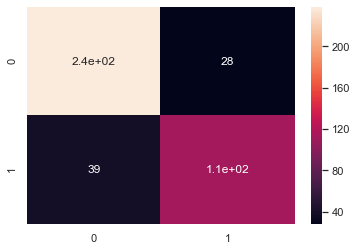

In [449]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)

In [450]:
res.to_csv('results/titanic_sub1.csv', index=False)

In [451]:
#end of code